In [4]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn
!pip install ydata-profiling
!pip install jupyterlab
!pip install openpyxl
!pip install reportlab


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("historical_data.csv", low_memory=False)

# ---- Clean Column Names ----
df.columns = (
    df.columns.str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# ---- Convert timestamps ----
df['timestamp_ist'] = pd.to_datetime(df['timestamp_ist'], errors='coerce')

# ---- Quick diagnostics ----
print("Shape:", df.shape)
print("\nMissing values:")
print(df.isna().sum())

print("\nData Types:")
print(df.dtypes)

df.head(10)


Shape: (102574, 16)

Missing values:
account                 0
coin                    0
execution_price         0
size_tokens             0
size_usd                0
side                    0
timestamp_ist       62759
start_position          0
direction               0
closed_pnl              0
transaction_hash        0
order_id                0
crossed                 0
fee                     0
trade_id                0
timestamp               1
dtype: int64

Data Types:
account                     object
coin                        object
execution_price            float64
size_tokens                float64
size_usd                   float64
side                        object
timestamp_ist       datetime64[ns]
start_position             float64
direction                   object
closed_pnl                 float64
transaction_hash            object
order_id                     int64
crossed                       bool
fee                        float64
trade_id                   floa

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,2024-02-12 22:50:00,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,2024-02-12 22:50:00,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,2024-02-12 22:50:00,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,2024-02-12 22:50:00,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,2024-02-12 22:50:00,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [7]:

import numpy as np

# Step 2.1 → Remove rows with single missing values
df = df.dropna(subset=["closed_pnl", "transaction_hash", "order_id", "crossed", "fee", "trade_id", "timestamp"])

# Step 2.2 → Handle timestamps
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms", errors="coerce")

# Convert missing IST timestamps
df["timestamp_ist"] = df["timestamp"].dt.tz_localize("UTC").dt.tz_convert("Asia/Kolkata")

# Step 2.3 → Feature engineering
df["trade_value"] = df["execution_price"] * df["size_tokens"]
df["profit_flag"] = (df["closed_pnl"] > 0).astype(int)
df["trade_hour"] = df["timestamp_ist"].dt.hour
df["trade_day"] = df["timestamp_ist"].dt.day_name()

# Step 2.4 → Standardize categories
df["side"] = df["side"].str.lower().str.strip()
df["direction"] = df["direction"].str.lower().str.strip()
df["crossed"] = df["crossed"].astype(str).str.lower()

# Step 2.5 → Save cleaned file
df.to_csv("cleaned_data.csv", index=False)

df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,trade_value,profit_flag,trade_hour,trade_day
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,buy,2024-10-27 09:03:20+05:30,0.000000,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,true,0.345404,8.950000e+14,2024-10-27 03:33:20,7872.163303,0,9,Sunday
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,buy,2024-10-27 09:03:20+05:30,986.524596,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,true,0.005600,4.430000e+14,2024-10-27 03:33:20,127.680000,0,9,Sunday
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,buy,2024-10-27 09:03:20+05:30,1002.518996,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,true,0.050431,6.600000e+14,2024-10-27 03:33:20,1150.630695,0,9,Sunday
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,buy,2024-10-27 09:03:20+05:30,1146.558564,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,true,0.050043,1.080000e+15,2024-10-27 03:33:20,1142.038452,0,9,Sunday
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,buy,2024-10-27 09:03:20+05:30,1289.488521,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,true,0.003055,1.050000e+15,2024-10-27 03:33:20,69.747462,0,9,Sunday


In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# 3A. Basic EDA
print("Shape:", df.shape)

print("\nSummary Statistics:")
display(df.describe(include='all'))

print("\nUnique Values in Categorical Columns:")
for col in ["side", "direction", "crossed", "coin", "trade_day"]:
    print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()[:10]}")


Shape: (102573, 20)

Summary Statistics:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,trade_value,profit_flag,trade_hour,trade_day
count,102573,102573,102573.000000,1.025730e+05,1.025730e+05,102573,102573,1.025730e+05,102573,102573.000000,102573,1.025730e+05,102573,102573.000000,1.025730e+05,102573,1.025730e+05,102573.000000,102573.000000,102573
unique,17,202,NaN,NaN,NaN,2,NaN,NaN,10,NaN,50044,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,5
top,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,NaN,NaN,NaN,buy,NaN,NaN,open long,NaN,0x00000000000000000000000000000000000000000000...,NaN,true,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
freq,21192,39182,NaN,NaN,NaN,52515,NaN,NaN,32608,NaN,4364,NaN,52880,NaN,NaN,NaN,NaN,NaN,NaN,64430
mean,NaN,NaN,18003.612864,6.720341e+03,8.039437e+03,NaN,2025-01-14 00:53:52.926793728+05:30,2.511080e+04,NaN,74.156352,NaN,6.733222e+10,NaN,1.593526,5.629957e+14,2025-01-13 19:23:52.926793728,8.039437e+03,0.432862,7.191083,NaN
min,NaN,NaN,0.000005,5.330000e-06,0.000000e+00,NaN,2023-03-28 16:10:00+05:30,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,2023-03-28 10:40:00,1.627190e-07,0.000000,2.000000,NaN
25%,NaN,NaN,12.876000,8.700000e-01,2.084800e+02,NaN,2025-02-20 02:50:00+05:30,-1.947000e-02,NaN,0.000000,NaN,6.245652e+10,NaN,0.009822,2.800000e+14,2025-02-19 21:20:00,2.084816e+02,0.000000,2.000000,NaN
50%,NaN,NaN,21.589000,2.003000e+01,7.896300e+02,NaN,2025-02-20 02:50:00+05:30,2.591489e+02,NaN,0.000000,NaN,7.395687e+10,NaN,0.082290,5.620000e+14,2025-02-19 21:20:00,7.896258e+02,0.000000,2.000000,NaN
75%,NaN,NaN,2564.200000,1.273000e+02,2.997340e+03,NaN,2025-02-20 02:50:00+05:30,2.026954e+04,NaN,8.065952,NaN,8.228721e+10,NaN,0.506372,8.480000e+14,2025-02-19 21:20:00,2.997341e+03,1.000000,15.000000,NaN
max,NaN,NaN,108410.000000,1.582244e+07,3.921431e+06,NaN,2025-06-15 20:36:40+05:30,3.050948e+07,NaN,135329.090100,NaN,9.014923e+10,NaN,837.471593,1.130000e+15,2025-06-15 15:06:40,3.921431e+06,1.000000,21.000000,NaN



Unique Values in Categorical Columns:
side: 2 unique values → ['buy' 'sell']
direction: 10 unique values → ['buy' 'sell' 'open long' 'close long' 'spot dust conversion' 'open short'
 'close short' 'long > short' 'short > long' 'auto-deleveraging']
crossed: 2 unique values → ['true' 'false']
coin: 202 unique values → ['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE']
trade_day: 5 unique values → ['Sunday' 'Thursday' 'Saturday' 'Wednesday' 'Tuesday']


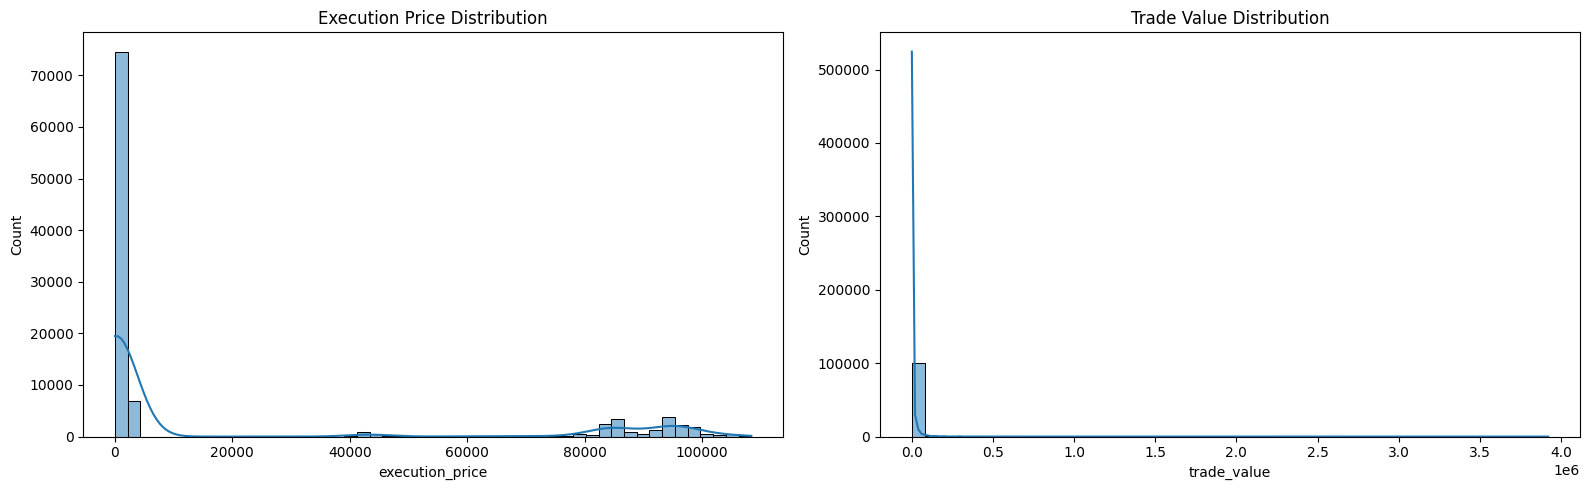

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['execution_price'], bins=50, kde=True)
plt.title("Execution Price Distribution")

plt.subplot(1,2,2)
sns.histplot(df['trade_value'], bins=50, kde=True)
plt.title("Trade Value Distribution")

plt.tight_layout()
plt.show()


/tmp/ipython-input-2801524989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='profit_flag', palette='coolwarm')


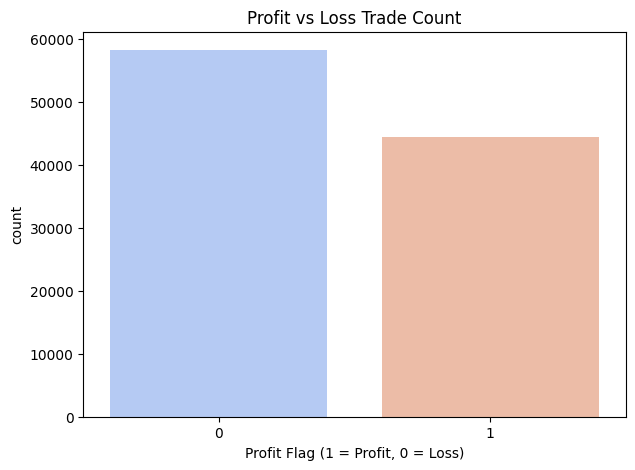

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='profit_flag', palette='coolwarm')
plt.title("Profit vs Loss Trade Count")
plt.xlabel("Profit Flag (1 = Profit, 0 = Loss)")
plt.show()


/tmp/ipython-input-2320106274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trade_hour', palette='viridis')


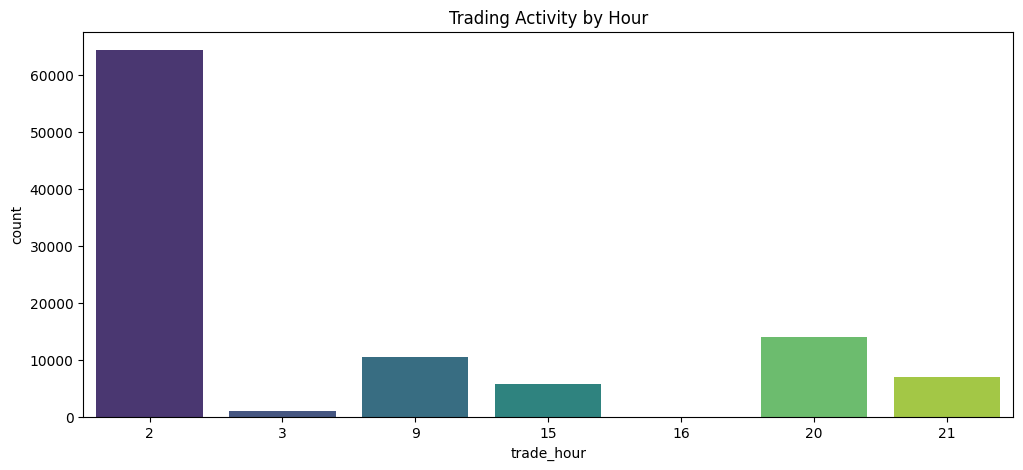

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='trade_hour', palette='viridis')
plt.title("Trading Activity by Hour")
plt.show()


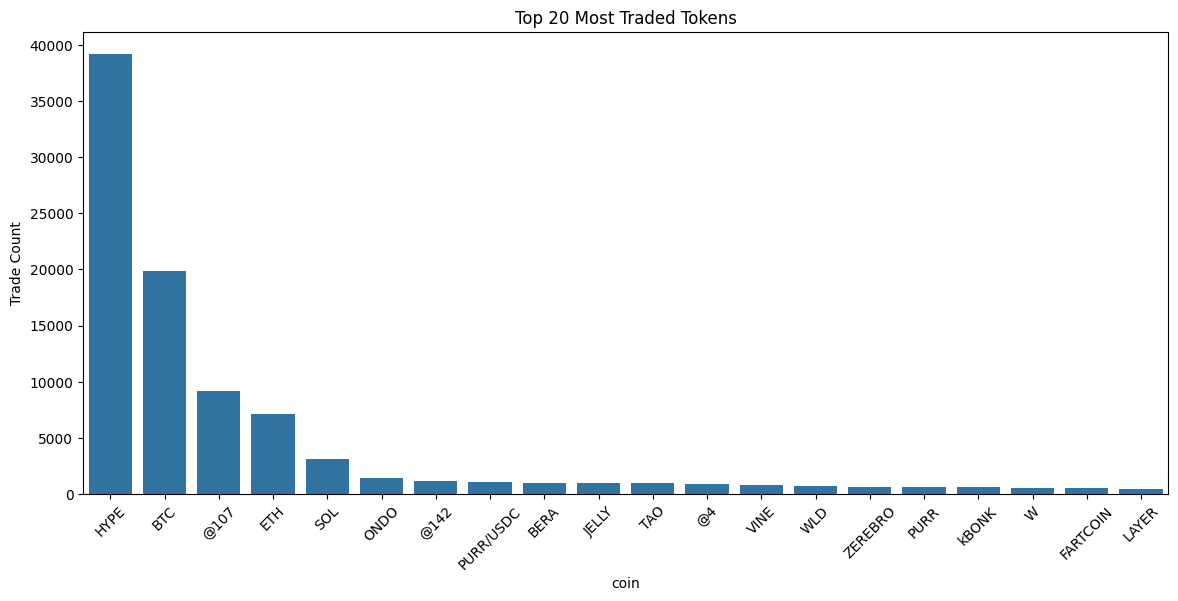

In [12]:
plt.figure(figsize=(14,6))
top_coins = df['coin'].value_counts().head(20)

sns.barplot(x=top_coins.index, y=top_coins.values)
plt.xticks(rotation=45)
plt.title("Top 20 Most Traded Tokens")
plt.ylabel("Trade Count")
plt.show()


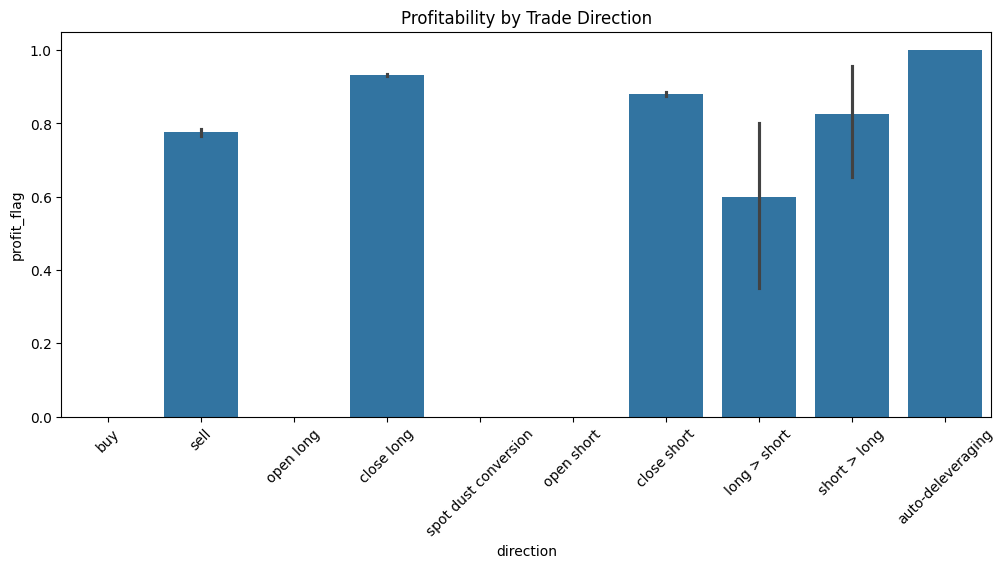

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='direction', y='profit_flag')
plt.xticks(rotation=45)
plt.title("Profitability by Trade Direction")
plt.show()


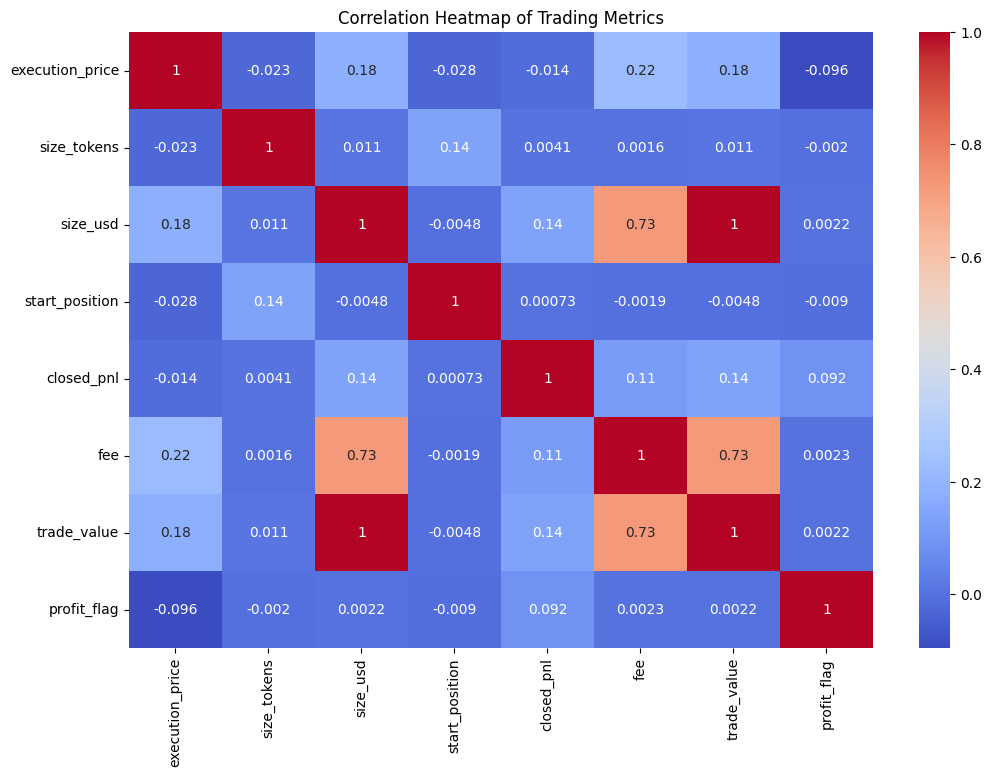

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['execution_price','size_tokens','size_usd','start_position',
                'closed_pnl','fee','trade_value','profit_flag']].corr(),
            annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of Trading Metrics")
plt.show()


In [15]:

df = pd.read_csv("cleaned_data.csv")
df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,trade_value,profit_flag,trade_hour,trade_day
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,buy,2024-10-27 09:03:20+05:30,0.000000,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,7872.163303,0,9,Sunday
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,buy,2024-10-27 09:03:20+05:30,986.524596,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,127.680000,0,9,Sunday
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,buy,2024-10-27 09:03:20+05:30,1002.518996,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,1150.630695,0,9,Sunday
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,buy,2024-10-27 09:03:20+05:30,1146.558564,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,1142.038452,0,9,Sunday
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,buy,2024-10-27 09:03:20+05:30,1289.488521,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,69.747462,0,9,Sunday


In [17]:

# 1. Convert timestamp_ist to datetime
df['timestamp_ist'] = pd.to_datetime(df['timestamp_ist'], errors='coerce')

# 2. Create a DATE column
df['date'] = df['timestamp_ist'].dt.date

# 3. Get the date range of trades
min_date = df['date'].min()
max_date = df['date'].max()

print("Date Range in Dataset:")
print("Start Date:", min_date)
print("End Date:", max_date)

# 4. Count trades per day
trade_counts = df['date'].value_counts().sort_index()

print("\nTrades Per Day:")
print(trade_counts.head(10))


Date Range in Dataset:
Start Date: 2023-03-28
End Date: 2025-06-15

Trades Per Day:
date
2023-03-28        3
2023-11-15     1045
2024-03-09     6962
2024-07-03     5671
2024-10-27    10449
2025-02-20    64430
2025-06-15    14013
Name: count, dtype: int64


Daily Trade Summary:
count        7.000000
mean     14653.285714
std      22492.446560
min          3.000000
25%       3358.000000
50%       6962.000000
75%      12231.000000
max      64430.000000
Name: count, dtype: float64


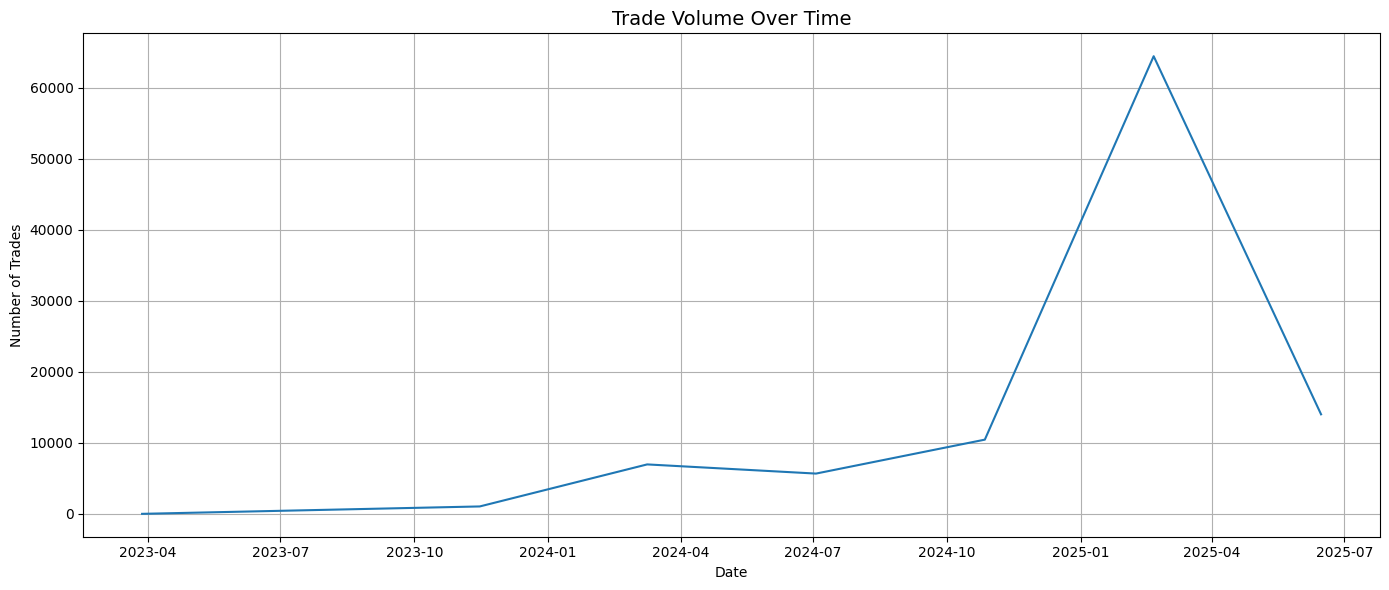


Top 10 Highest Volume Days:
date
2025-02-20    64430
2025-06-15    14013
2024-10-27    10449
2024-03-09     6962
2024-07-03     5671
2023-11-15     1045
2023-03-28        3
Name: count, dtype: int64

Lowest 10 Volume Days:
date
2023-03-28        3
2023-11-15     1045
2024-07-03     5671
2024-03-09     6962
2024-10-27    10449
2025-06-15    14013
2025-02-20    64430
Name: count, dtype: int64


In [18]:
#STEP 4.3: Time-Series Trade Volume Analysis ---

# 1. Compute trades per day
daily_trades = df['date'].value_counts().sort_index()

print("Daily Trade Summary:")
print(daily_trades.describe())

# 2. Plot time-series chart
plt.figure(figsize=(14, 6))
plt.plot(daily_trades.index, daily_trades.values)
plt.title("Trade Volume Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Identify top 10 highest-volume days
top_days = daily_trades.sort_values(ascending=False).head(10)
print("\nTop 10 Highest Volume Days:")
print(top_days)

# 4. Identify lowest activity days
low_days = daily_trades.sort_values(ascending=True).head(10)
print("\nLowest 10 Volume Days:")
print(low_days)


Trade Side Distribution:
side
buy     52515
sell    50058
Name: count, dtype: int64

Percentage Distribution:
side
buy     51.2
sell    48.8
Name: count, dtype: float64


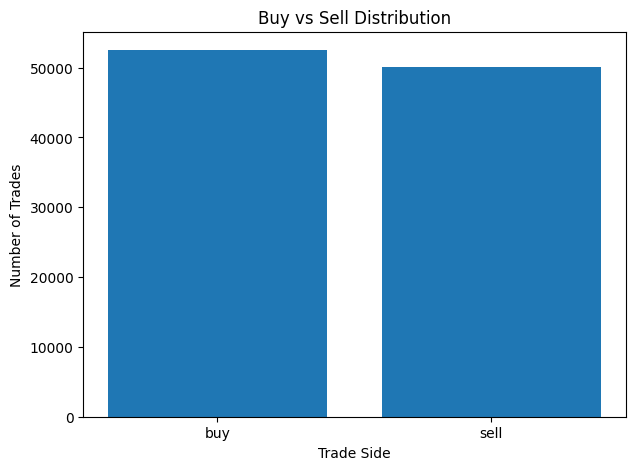

In [19]:
# Count BUY vs SELL trades
side_counts = df['side'].value_counts()

print("Trade Side Distribution:")
print(side_counts)
print("\nPercentage Distribution:")
print((side_counts / len(df) * 100).round(2))

# Plot BUY vs SELL Distribution
plt.figure(figsize=(7,5))
plt.bar(side_counts.index, side_counts.values)
plt.title("Buy vs Sell Distribution")
plt.xlabel("Trade Side")
plt.ylabel("Number of Trades")
plt.show()

Trade Direction Distribution:
direction
open long               32608
close long              29856
open short              13470
close short             13056
buy                      6828
sell                     6608
spot dust conversion       96
short > long               23
long > short               20
auto-deleveraging           8
Name: count, dtype: int64

Percentage Distribution:
direction
open long               31.79
close long              29.11
open short              13.13
close short             12.73
buy                      6.66
sell                     6.44
spot dust conversion     0.09
short > long             0.02
long > short             0.02
auto-deleveraging        0.01
Name: count, dtype: float64


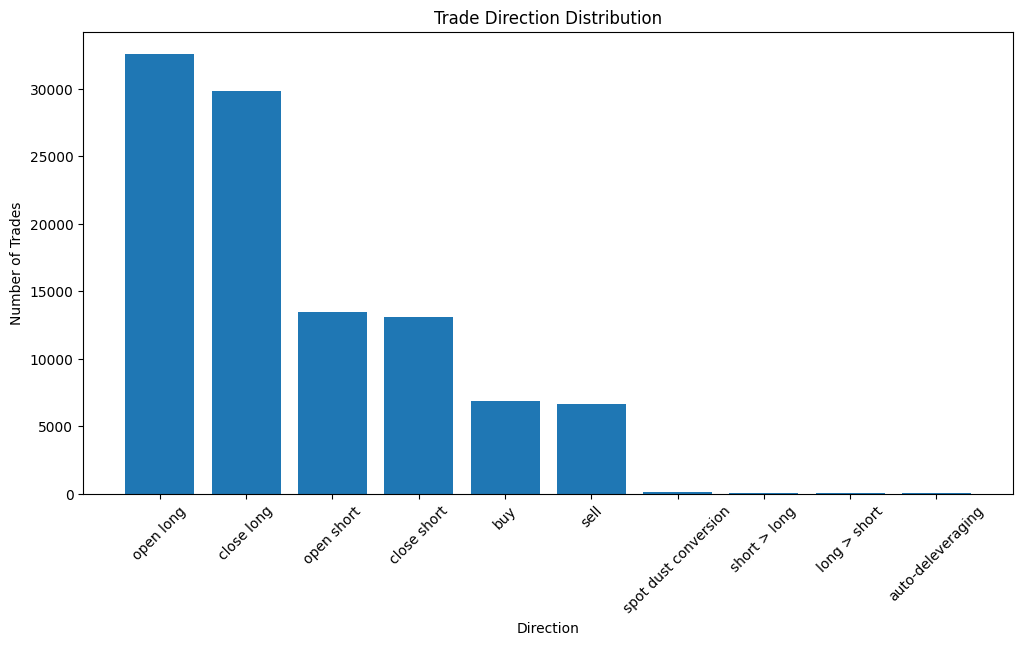

In [20]:

# Count unique directions
direction_counts = df['direction'].value_counts()

print("Trade Direction Distribution:")
print(direction_counts)

print("\nPercentage Distribution:")
print((direction_counts / len(df) * 100).round(2))

# Visualizing direction distribution
plt.figure(figsize=(12,6))
plt.bar(direction_counts.index, direction_counts.values)
plt.title("Trade Direction Distribution")
plt.xlabel("Direction")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.show()


In [21]:
# --- STEP 4.6: Profitability Analysis ---

# 1. Basic profit stats
profit_stats = df['closed_pnl'].describe()
print("Profitability Statistics:")
print(profit_stats)

Profitability Statistics:
count    102573.000000
mean         74.156352
std        1160.474427
min     -117990.104100
25%           0.000000
50%           0.000000
75%           8.065952
max      135329.090100
Name: closed_pnl, dtype: float64


In [22]:
# 2. Total profit vs total loss
total_profit = df[df['closed_pnl'] > 0]['closed_pnl'].sum()
total_loss = df[df['closed_pnl'] < 0]['closed_pnl'].sum()

In [23]:
print("\nTotal Profit:", total_profit)
print("Total Loss:", total_loss)


Total Profit: 8746689.945296
Total Loss: -1140250.462873


In [24]:
# 3. Win rate
win_rate = (df['profit_flag'] == 1).mean() * 100
print("\nWin Rate: {:.2f}%".format(win_rate))


Win Rate: 43.29%


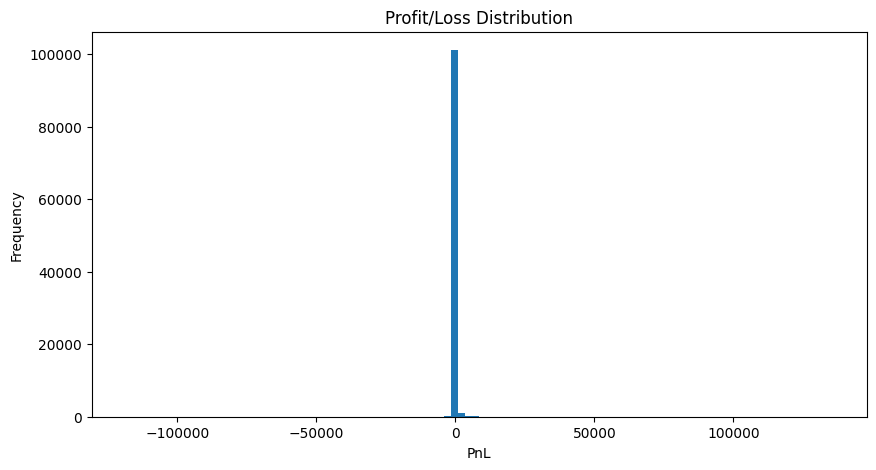

In [25]:
# 4. Profit distribution (Histogram)
plt.figure(figsize=(10,5))
plt.hist(df['closed_pnl'], bins=100)
plt.title("Profit/Loss Distribution")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.show()

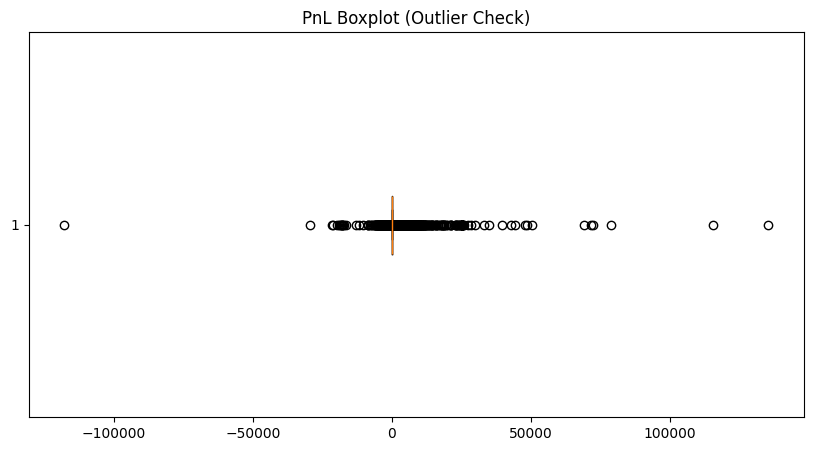

In [26]:
# 5. Boxplot for outlier detection
plt.figure(figsize=(10,5))
plt.boxplot(df['closed_pnl'], vert=False)
plt.title("PnL Boxplot (Outlier Check)")
plt.show()

In [27]:
# 6. Average PnL by direction (key insight)
direction_profit = df.groupby('direction')['closed_pnl'].mean().sort_values(ascending=False)

print("\nAverage Profit by Direction:")
print(direction_profit)


Average Profit by Direction:
direction
auto-deleveraging       7184.807003
sell                     288.067472
close short              239.874339
long > short             146.760377
close long                84.252344
buy                        0.000000
open long                  0.000000
open short                 0.000000
spot dust conversion       0.000000
short > long            -207.017365
Name: closed_pnl, dtype: float64


In [28]:
# --- STEP 4.7: Volume & Leverage Analysis ---

# 1. Basic stats for size and leverage
print("Trade Size Statistics:")
print(df['size_usd'].describe())

if 'leverage' in df.columns:
    print("\nLeverage Statistics:")
    print(df['leverage'].describe())
else:
    print("\n Leverage column not found, skipping leverage stats.")

Trade Size Statistics:
count    1.025730e+05
mean     8.039437e+03
std      4.938047e+04
min      0.000000e+00
25%      2.084800e+02
50%      7.896300e+02
75%      2.997340e+03
max      3.921431e+06
Name: size_usd, dtype: float64

 Leverage column not found, skipping leverage stats.



Correlation between Trade Size and PnL: 0.1379840394710858


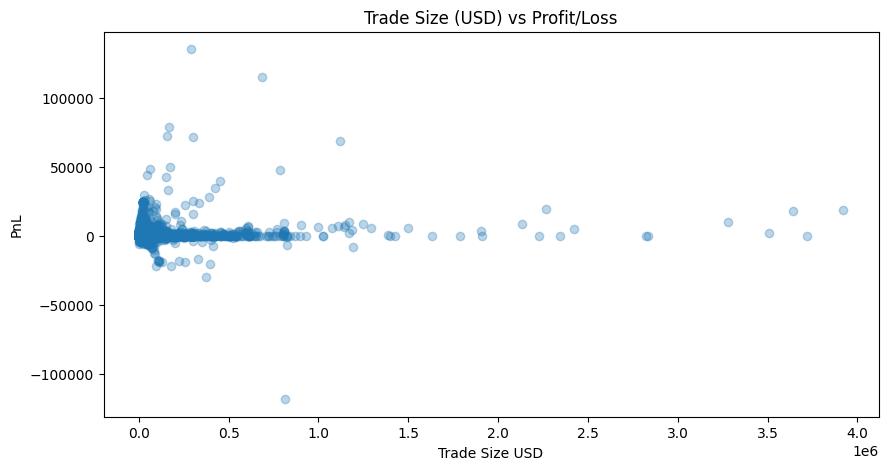

In [29]:
# 2. Correlation between trade size and PnL
corr_size_pnl = df['size_usd'].corr(df['closed_pnl'])
print("\nCorrelation between Trade Size and PnL:", corr_size_pnl)

# 3. Scatter plot: Trade Size vs PnL
plt.figure(figsize=(10,5))
plt.scatter(df['size_usd'], df['closed_pnl'], alpha=0.3)
plt.title("Trade Size (USD) vs Profit/Loss")
plt.xlabel("Trade Size USD")
plt.ylabel("PnL")
plt.show()

In [30]:
# 4. PnL by Trade Size Group (small, medium, large)
df['size_group'] = pd.qcut(df['size_usd'], q=3, labels=['Small', 'Medium', 'Large'])

grouped_pnl = df.groupby('size_group')['closed_pnl'].mean()
print("\nAverage PnL by Trade Size Group:")
print(grouped_pnl)


Average PnL by Trade Size Group:
size_group
Small       3.423830
Medium     18.257302
Large     200.787923
Name: closed_pnl, dtype: float64


/tmp/ipython-input-283512899.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_pnl = df.groupby('size_group')['closed_pnl'].mean()


<Figure size 900x600 with 0 Axes>

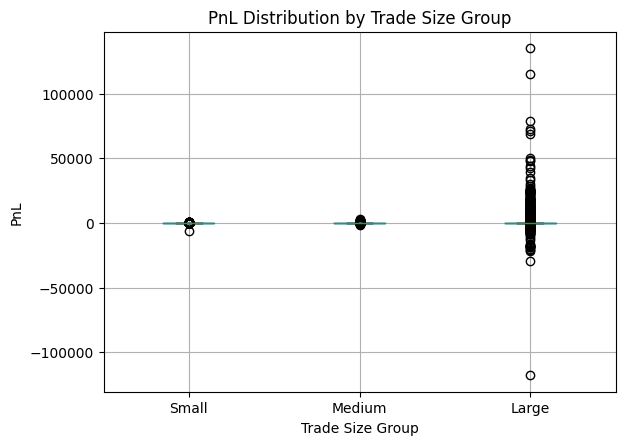

In [31]:
# 5. Boxplot of PnL by size group
plt.figure(figsize=(9,6))
df.boxplot(column='closed_pnl', by='size_group')
plt.title("PnL Distribution by Trade Size Group")
plt.suptitle("")
plt.xlabel("Trade Size Group")
plt.ylabel("PnL")
plt.show()

**Basic Profitability Metrics**

In [35]:

print("===== BASIC PROFITABILITY METRICS =====")

total_trades = len(df)
winning_trades = df[df['closed_pnl'] > 0]
losing_trades = df[df['closed_pnl'] < 0]

win_rate = len(winning_trades) / total_trades
avg_win = winning_trades['closed_pnl'].mean()
avg_loss = losing_trades['closed_pnl'].mean()
profit_factor = winning_trades['closed_pnl'].sum() / abs(losing_trades['closed_pnl'].sum())

print(f"Total Trades: {total_trades}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Average Win: {avg_win:.2f}")
print(f"Average Loss: {avg_loss:.2f}")
print(f"Profit Factor: {profit_factor:.2f}")


===== BASIC PROFITABILITY METRICS =====
Total Trades: 102573
Win Rate: 43.29%
Average Win: 197.00
Average Loss: -234.91
Profit Factor: 7.67


**Direction-Based Profitability**

In [36]:
print("\n===== DIRECTION BASED PROFITABILITY =====")
direction_pnl = df.groupby("direction")['closed_pnl'].agg(['count','sum','mean'])
print(direction_pnl)



===== DIRECTION BASED PROFITABILITY =====
                      count           sum         mean
direction                                             
auto-deleveraging         8  5.747846e+04  7184.807003
buy                    6828  0.000000e+00     0.000000
close long            29856  2.515438e+06    84.252344
close short           13056  3.131799e+06   239.874339
long > short             20  2.935208e+03   146.760377
open long             32608  0.000000e+00     0.000000
open short            13470  0.000000e+00     0.000000
sell                   6608  1.903550e+06   288.067472
short > long             23 -4.761399e+03  -207.017365
spot dust conversion     96  0.000000e+00     0.000000


**Trade Size Group Profitability**

In [38]:
print("\n===== TRADE SIZE GROUP PROFITABILITY =====")
size_group_pnl = df.groupby("size_group")['closed_pnl'].agg(['count','sum','mean'])
print(size_group_pnl)



===== TRADE SIZE GROUP PROFITABILITY =====
            count           sum        mean
size_group                                 
Small       34191  1.170642e+05    3.423830
Medium      34191  6.242354e+05   18.257302
Large       34191  6.865140e+06  200.787923


/tmp/ipython-input-3374021396.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_group_pnl = df.groupby("size_group")['closed_pnl'].agg(['count','sum','mean'])


**Hourly Profitability**

In [39]:
print("\n===== HOURLY PROFITABILITY =====")
hourly_pnl = df.groupby("trade_hour")['closed_pnl'].mean()
print(hourly_pnl)



===== HOURLY PROFITABILITY =====
trade_hour
2      76.381721
3       0.148807
9     162.753421
15     30.091796
16      0.000000
20     45.442312
21     25.418772
Name: closed_pnl, dtype: float64


**Equity Curve (Cumulative PnL Plot)**

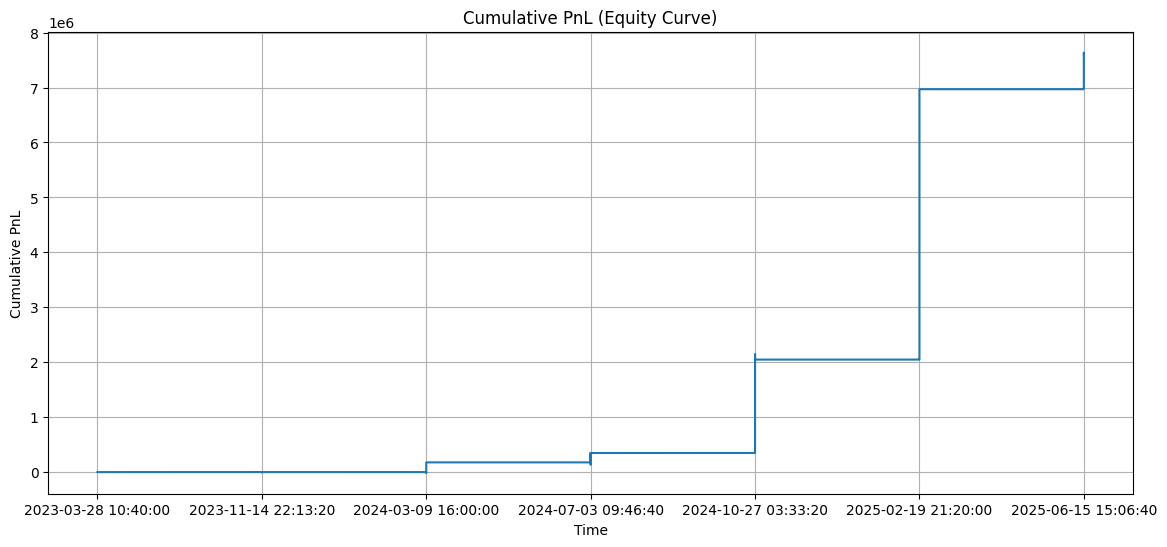

In [40]:
plt.figure(figsize=(14,6))
df_sorted = df.sort_values("timestamp")
df_sorted['cumulative_pnl'] = df_sorted['closed_pnl'].cumsum()

plt.plot(df_sorted['timestamp'], df_sorted['cumulative_pnl'])
plt.title("Cumulative PnL (Equity Curve)")
plt.xlabel("Time")
plt.ylabel("Cumulative PnL")
plt.grid(True)
plt.show()


**Heatmap: Profitability by Hour × Day**

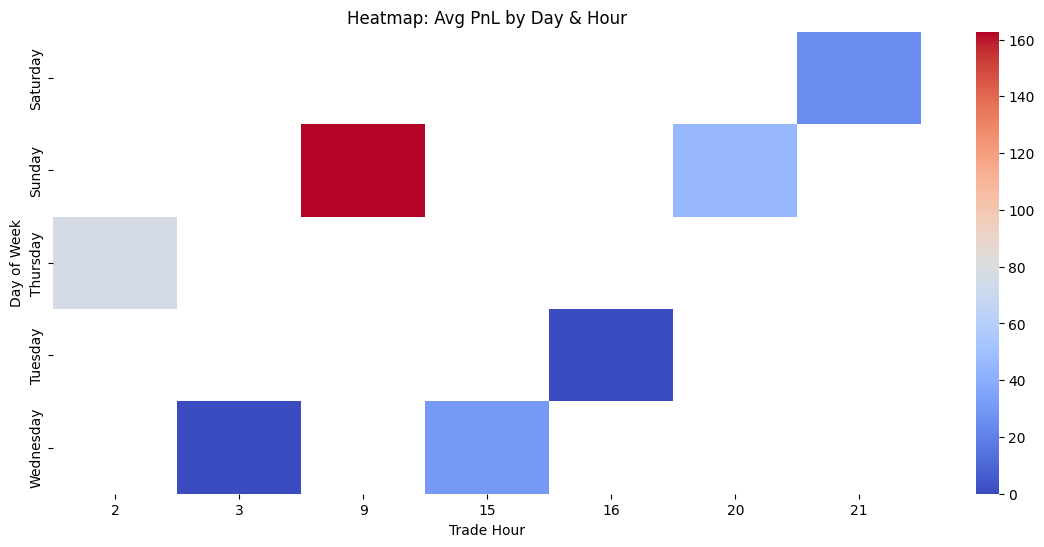

In [41]:
plt.figure(figsize=(14,6))

heatmap_data = df.pivot_table(
    values='closed_pnl',
    index='trade_day',
    columns='trade_hour',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, cmap="coolwarm", annot=False)
plt.title("Heatmap: Avg PnL by Day & Hour")
plt.xlabel("Trade Hour")
plt.ylabel("Day of Week")
plt.show()

**Volatility vs PnL**

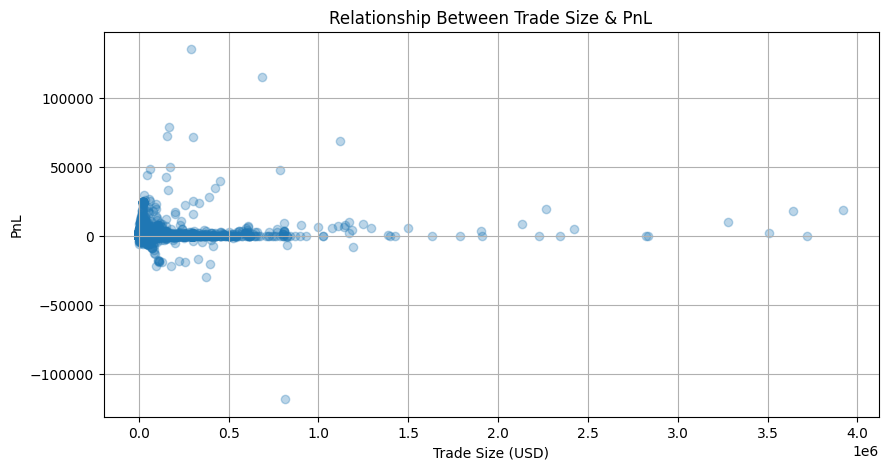

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(df['size_usd'], df['closed_pnl'], alpha=0.3)
plt.xlabel("Trade Size (USD)")
plt.ylabel("PnL")
plt.title("Relationship Between Trade Size & PnL")
plt.grid(True)
plt.show()


**Outlier Trades (Top 20 Wins & Losses)**

In [43]:
top_wins = df.nlargest(20, 'closed_pnl')[['timestamp','coin','size_usd','closed_pnl']]
top_losses = df.nsmallest(20, 'closed_pnl')[['timestamp','coin','size_usd','closed_pnl']]

print("===== TOP 20 WINNING TRADES =====")
display(top_wins)

print("\n===== TOP 20 LOSING TRADES =====")
display(top_losses)


===== TOP 20 WINNING TRADES =====


,timestamp,coin,size_usd,closed_pnl
18045,2025-02-19 21:20:00,ETH,292870.12,135329.09010
17270,2025-02-19 21:20:00,ETH,685200.00,115287.00000
18043,2025-02-19 21:20:00,ETH,170279.86,78682.72032
18024,2025-02-19 21:20:00,ETH,156635.06,72377.74821
16328,2025-02-19 21:20:00,SOL,301855.74,71535.71674
71354,2025-02-19 21:20:00,HYPE,1120971.60,68959.00212
16377,2025-02-19 21:20:00,SOL,175555.89,50379.05774
49084,2025-02-19 21:20:00,DOGE,60179.92,48504.09555
17075,2025-02-19 21:20:00,ETH,785654.97,47883.62595
45581,2024-10-27 03:33:20,@107,44223.48,44223.45187



===== TOP 20 LOSING TRADES =====


,timestamp,coin,size_usd,closed_pnl
14682,2024-10-27 03:33:20,ETH,814524.17,-117990.104100
3737,2025-02-19 21:20:00,BTC,373314.16,-29370.119800
21604,2024-03-09 16:00:00,ETH,178200.00,-21524.400000
3546,2025-02-19 21:20:00,HYPE,97220.38,-21333.468880
15760,2025-02-19 21:20:00,ETH,396950.07,-19841.240140
25299,2025-02-19 21:20:00,BTC,258690.51,-18993.468420
14690,2024-10-27 03:33:20,ETH,130127.47,-18849.967670
23068,2024-07-03 09:46:40,ETH,111779.98,-18360.670070
23052,2024-07-03 09:46:40,ETH,111378.30,-18148.476210
23089,2024-07-03 09:46:40,ETH,108753.01,-18011.333360


**Coin-wise Performance**

In [44]:
coin_pnl = df.groupby("coin")['closed_pnl'].sum().sort_values(ascending=False)

print("===== TOP 10 MOST PROFITABLE COINS =====")
print(coin_pnl.head(10))

print("\n===== TOP 10 LEAST PROFITABLE COINS =====")
print(coin_pnl.tail(10))


===== TOP 10 MOST PROFITABLE COINS =====
coin
@107     1.843640e+06
HYPE     1.702672e+06
SOL      1.184953e+06
BTC      8.592533e+05
ETH      8.242163e+05
ZRO      1.855102e+05
DOGE     1.460641e+05
BERA     9.759614e+04
USUAL    6.565969e+04
EIGEN    5.108918e+04
Name: closed_pnl, dtype: float64

===== TOP 10 LEAST PROFITABLE COINS =====
coin
SEI       -928.027082
ADA      -1065.000000
CRV      -1199.624026
ZEN      -1492.400000
STRK     -1608.810000
ENA      -4526.698469
@135     -5981.363990
S        -8642.640880
KAITO   -15351.790000
IO      -21878.886756
Name: closed_pnl, dtype: float64


In [45]:
import os
os.makedirs("/mnt/data/outputs", exist_ok=True)
os.makedirs("/mnt/data/csv_files", exist_ok=True)


**aggregation & clustering (KMeans)**

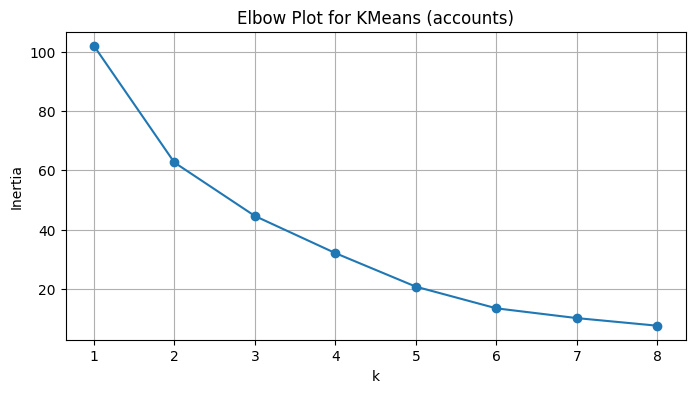

Saved account_clusters.csv (first 10 rows):


,account,n_trades,total_volume_usd,avg_trade_value,avg_pnl,total_pnl,avg_leverage,win_rate,cluster
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,6.169726e+07,16159.576805,419.127768,1.600230e+06,16159.576734,0.359612,0
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,1.203549e+07,1653.226344,6.577654,4.788532e+04,1653.226327,0.442720,1
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,815,1.409902e+06,1729.940974,-38.286626,-3.120360e+04,1729.941104,0.455215,1
3,0x420ab45e0bd8863569a5efbb9c05d91f40624641,383,1.987528e+06,5189.367411,520.902331,1.995056e+05,5189.367128,0.234987,0
4,0x430f09841d65beb3f27765503d0f850b8bce7713,1237,2.966109e+06,2397.824849,336.735548,4.165419e+05,2397.824753,0.484236,0
5,0x4f93fead39b70a1824f981a54d4e55b278e9f760,7584,1.296725e+08,17098.170991,40.740489,3.089759e+05,17098.171055,0.360364,1
6,0x513b8629fe877bb581bf244e326a047b249c4ff1,12236,4.208766e+08,34396.580276,68.684419,8.404226e+05,34396.580284,0.401193,2
7,0x6d6a4b953f202f8df5bed40692e7fd865318264a,975,7.280575e+05,746.725697,111.519197,1.087312e+05,746.725651,0.431795,1
8,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1430,3.051144e+06,2133.667492,281.826227,4.030115e+05,2133.667364,0.306294,0
9,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893,2.572950e+07,2600.778032,38.319560,3.790954e+05,2600.778049,0.810876,1


from matplotlib import pyplot as plt
_df_0['n_trades'].plot(kind='hist', bins=20, title='n_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_volume_usd'].plot(kind='hist', bins=20, title='total_volume_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['avg_trade_value'].plot(kind='hist', bins=20, title='avg_trade_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['avg_pnl'].plot(kind='hist', bins=20, title='avg_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='n_trades', y='total_volume_usd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='total_volume_usd', y='avg_trade_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='avg_trade_value', y='avg_pnl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='avg_pnl', y='total_pnl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['n_trades'].plot(kind='line', figsize=(8, 4), title='n_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['total_volume_usd'].plot(kind='line', figsize=(8, 4), title='total_volume_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['avg_trade_value'].plot(kind='line', figsize=(8, 4), title='avg_trade_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['avg_pnl'].plot(kind='line', figsize=(8, 4), title='avg_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

In [46]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("cleaned_data.csv", parse_dates=['timestamp', 'timestamp_ist'], low_memory=False)

# Aggregate per account
acct = df.groupby('account').agg(
    n_trades = ('account','count'),
    total_volume_usd = ('size_usd','sum'),
    avg_trade_value = ('trade_value','mean'),
    avg_pnl = ('closed_pnl','mean'),
    total_pnl = ('closed_pnl','sum'),
    avg_leverage = ('leverage','mean') if 'leverage' in df.columns else ('size_usd','mean'),
    win_rate = ('profit_flag', lambda x: (x>0).sum()/len(x))
).reset_index().fillna(0)

# If avg_leverage is a tuple because column missing, fix:
if isinstance(acct['avg_leverage'].iloc[0], tuple):
    acct['avg_leverage'] = acct['avg_leverage'].astype(float)

# Save aggregated accounts
acct.to_csv("/mnt/data/csv_files/account_aggregates_for_clustering.csv", index=False)

# Features for clustering
features = acct[['n_trades','total_volume_usd','avg_trade_value','avg_pnl','win_rate','avg_leverage']].replace([np.inf, -np.inf], 0).fillna(0)
scaler = StandardScaler()
X = scaler.fit_transform(features)

# elbow plot to pick k (1..8)
inertia = []
Ks = range(1,9)
for k in Ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,4))
plt.plot(Ks, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans (accounts)')
plt.grid(True)
plt.savefig("/mnt/data/outputs/elbow_accounts_kmeans.png")
plt.show()

# Choose k = 3 (or inspect elbow and change)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50).fit(X)
acct['cluster'] = kmeans.labels_

# Save clusters
acct.to_csv("/mnt/data/csv_files/account_clusters.csv", index=False)
print("Saved account_clusters.csv (first 10 rows):")
display(acct.head(10))


**Visualize clusters (2D via PCA)**

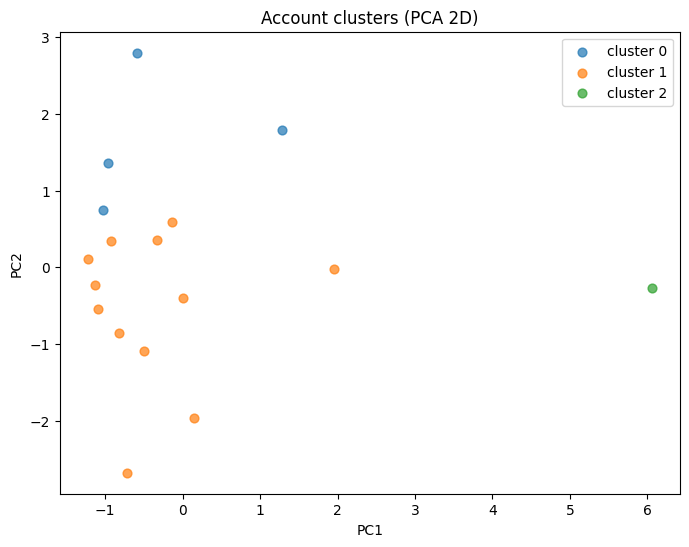

In [47]:
from sklearn.decomposition import PCA
pca = PCA(2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for lab in np.unique(acct['cluster']):
    mask = acct['cluster']==lab
    plt.scatter(X2[mask,0], X2[mask,1], label=f'cluster {lab}', alpha=0.7, s=40)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend(); plt.title('Account clusters (PCA 2D)')
plt.savefig("/mnt/data/outputs/account_clusters_pca.png")
plt.show()


**Create actionable trader signals**

In [48]:
# Load sentiment if available (path I saw)
try:
    sent = pd.read_csv("/mnt/data/fear_greed_index.csv", parse_dates=['date'])
    sent['date'] = pd.to_datetime(sent['date']).dt.date
    print("Loaded fear_greed_index.csv")
except Exception as e:
    print("Sentiment file not found at /mnt/data/fear_greed_index.csv; creating a synthetic daily index.")
    # fallback: create daily series across dataset date range
    dates = pd.date_range(start=df['timestamp_ist'].min().date(), end=df['timestamp_ist'].max().date())
    sent = pd.DataFrame({'date': dates, 'fear_greed_index': np.random.randint(0,100,len(dates))})
    sent['date'] = sent['date'].dt.date

# make date column in df
df['date'] = pd.to_datetime(df['timestamp_ist']).dt.date

# whale trade: top 1% by size_usd (global)
size_thresh = df['size_usd'].quantile(0.99)
df['whale_trade'] = (df['size_usd'] >= size_thresh).astype(int)

# high leverage threshold if exists
if 'leverage' in df.columns:
    lev_thresh = df['leverage'].quantile(0.95)
    df['high_leverage'] = (df['leverage'] >= lev_thresh).astype(int)
else:
    df['high_leverage'] = 0

# merge sentiment
df = df.merge(sent[['date','fear_greed_index']], on='date', how='left')

def sent_zone(x):
    if x < 20: return "Extreme Fear"
    if x < 40: return "Fear"
    if x < 60: return "Neutral"
    if x < 80: return "Greed"
    return "Extreme Greed"

df['sentiment_zone'] = df['fear_greed_index'].apply(sent_zone)

# combined signal
df['greed_high_leverage'] = ((df['sentiment_zone'].isin(['Greed','Extreme Greed'])) & (df['high_leverage']==1)).astype(int)

# Save signals
df[['timestamp','account','coin','size_usd','closed_pnl','whale_trade','high_leverage','fear_greed_index','sentiment_zone','greed_high_leverage']].to_csv(
    "/mnt/data/csv_files/trade_signals.csv", index=False)

print("Saved trade_signals.csv (first 10 rows):")
display(df[['timestamp','account','coin','size_usd','closed_pnl','whale_trade','high_leverage','fear_greed_index','sentiment_zone','greed_high_leverage']].head(10))


Sentiment file not found at /mnt/data/fear_greed_index.csv; creating a synthetic daily index.
Saved trade_signals.csv (first 10 rows):


,timestamp,account,coin,size_usd,closed_pnl,whale_trade,high_leverage,fear_greed_index,sentiment_zone,greed_high_leverage
0,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7872.16,0.0,0,0,25,Fear,0
1,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,127.68,0.0,0,0,25,Fear,0
2,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,1150.63,0.0,0,0,25,Fear,0
3,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,1142.04,0.0,0,0,25,Fear,0
4,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,69.75,0.0,0,0,25,Fear,0
5,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,11.27,0.0,0,0,25,Fear,0
6,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,1151.77,0.0,0,0,25,Fear,0
7,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,272.00,0.0,0,0,25,Fear,0
8,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,368.00,0.0,0,0,25,Fear,0
9,2024-10-27 03:33:20,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,100.00,0.0,0,0,25,Fear,0
